# Task 2: Logistic Regression Modeling

Alex Rivera ID#011243153

Western Governors University

D208 - Predictive Modeling

September 07, 2023

## A1: Research Question

The research question that is going to be investigated is, "Which factors significantly impact customer churn?"

## A2: Goals

The objective of the analysis is to gain a better insight into the factors that impact customer churn. The dataset has a profile of customer characteristics and services that could help shed some light on variables that impact customer churn. Knowing these insights can lead to identifying trends or creating company metrics that prevent customer churn. The impact of the analysis can help maintain customer rentention and profits.  

## B1: Summary Of Assumptions

According to the Statology website, provided are four logistic regression assumptions (Bobbitt, 2020).

•	The target variable is binary. 

•	There is no multicollinearity among explanatory variables. 

•	There are no extreme outliers. 

•	The observations are independent.  


## B2: Tool Benefits

The programming language used for the logistic regression analysis is Python. Python is a general-purpose programming language that is not only useful for data analysis but often used for web development, software development, mathematics, and system scripting (R or Python, 2022). The main advantage of choosing Python is its speed and code readability. Its consistent syntax is one of the reasons I leverage Python for data analysis projects as learning new libraries or packages is straightforward. The following packages and libraries helped in executing the data analysis throughout the project. Pandas library is the backbone for all data manipulation. Numpy for working with scientific computation and arrays. Matplotlib and Seaborn were leveraged for data visualizations. Scikit-learn and statsmodels to implement the logistic regression modeling from preprocessing to metrics. 

## B3: Appropriate Technique

To understand why logistic regression is the right technique for answering, "Which factors significantly impact customer churn?" the question will be need to broken down. First, the dependent variable customer churn is binary or categorial, this meets the first assumption in section B1. The data cleaning goals in section C1 will cover the next two assumptions of having no extreme outliers and checking for independent observations (no duplicates). Finally, multicollinearity among explanatory variables will be verified in the model reduction phase of the logistic regression analysis.   

## C1: Data Cleaning Goals

The data cleaning goals ahead of the logistic regression analysis are checking for duplicates, treating null values, replacing values, changing data types, and creating the data frame with the relevant variables. The CSV provided with the project is the same file analysis in previous projects, it is a fairly clean file but the steps were taken to treat for any data cleaning goals. D206 Data Cleaning and D208 Task 1 project codes were both referenced as the data cleaning section worked through these steps (Rivera, 2023). First, checking for duplicates is done with two methods duplicated() and value_counts() function combination and .is_unique() checking for any duplicates in the data frame. Replacing values with the Python syntax is fairly straightforward "replace(oldvalue, newvalue)", making clean up of the variable values simple with a few lines of code. Renaming columns and changing category types to have a consistent format was the last data-cleaning step. Finally, the data frame with the relevant variables was created for logistic regression. 

In [1]:
#Importing necessary packages for the Logistic Regression project 
import pandas as pd 
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#Loading the churn dataset flat file into a pandas dataframe 
churn = pd.read_csv('C:/Users/alexa/WGU/D208/Project/churn_clean.csv', index_col=0)

#Running info() for an overview of the dataframe 
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [2]:
#Setting options to view max columns for review during data cleaning
pd.set_option("display.max_columns", None)

#Viewing dataframe
churn

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,Rural,America/New_York,Sport and exercise psychologist,3,23,55723.74,Married,Male,No,9.415935,12,2,0,No,Month-to-month,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601,3,2,3,3,4,3,2,3
9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,Rural,America/Chicago,Consulting civil engineer,4,48,34129.34,Divorced,Male,No,6.740547,15,2,0,No,Two Year,No,No,Fiber Optic,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810,4,5,5,4,4,5,2,5
9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,Rural,America/Chicago,IT technical support officer,1,48,45983.43,Never Married,Female,No,6.590911,10,0,0,No,Month-to-month,No,No,Fiber Optic,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799,4,4,4,4,4,4,4,5


In [3]:
#Detecting duplicates in the churn dataframe
print(churn.duplicated().value_counts())

#Dectecting if Customer_id is unique to confirm no duplicates
churn['Customer_id'].is_unique

False    10000
dtype: int64


True

In [4]:
#Dectecting null values in the dataframe 
churn.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

In [5]:
#Running a block of code to change column types to categorical or boolean and replace text to match the dataset dictionary
churn["Area"] = churn["Area"].astype("category")
churn.TimeZone.replace({
    "America/Anchorage" : "Alaska Time Zone",
    "America/Juneau" : "Alaska Time Zone",
    "America/Nome" : "Alaska Time Zone",
    "America/Sitka" : "Alaska Time Zone",
    "America/Puerto_Rico" : "Atlantic Time Zone",
    "America/Chicago" : "Central Time Zone",
    "America/Indiana/Knox" : "Central Time Zone",
    "America/Indiana/Tell_City" : "Central Time Zone",
    "America/Menominee" : "Central Time Zone",
    "America/North_Dakota/New_Salem" : "Central Time Zone",
    "America/Detroit" : "Eastern Time Zone",
    "America/Indiana/Indianapolis" : "Eastern Time Zone",
    "America/Indiana/Marengo" : "Eastern Time Zone",
    "America/Indiana/Petersburg" : "Eastern Time Zone",
    "America/Indiana/Vincennes" : "Eastern Time Zone",
    "America/Indiana/Winamac" : "Eastern Time Zone",
    "America/Kentucky/Louisville" : "Eastern Time Zone",
    "America/New_York" : "Eastern Time Zone",
    "America/Toronto" : "Eastern Time Zone",
    "Pacific/Honolulu" : "Hawaii-Aleutian Time Zone",
    "America/Boise" : "Mountain Time Zone",
    "America/Denver" : "Mountain Time Zone",
    "America/Ojinaga" : "Mountain Time Zone",
    "America/Phoenix" : "Mountain Time Zone",
    "America/Los_Angeles" : "Pacific Time Zone"
    }, inplace=True)
churn["TimeZone"] = churn["TimeZone"].astype("category")
churn["Marital"] = churn["Marital"].astype("category")
churn.Gender.replace("Prefer not to answer","Nonbinary", inplace=True)
churn["Gender"] = churn["Gender"].astype("category")
churn["InternetService"] = churn["InternetService"].astype("category")
churn["PaymentMethod"] = churn["PaymentMethod"].astype("category")
churn["Item1"] = churn["Item1"].astype("category")
churn["Item2"] = churn["Item2"].astype("category")
churn["Item3"] = churn["Item3"].astype("category")
churn["Item4"] = churn["Item4"].astype("category")
churn["Item5"] = churn["Item5"].astype("category")
churn["Item6"] = churn["Item6"].astype("category")
churn["Item7"] = churn["Item7"].astype("category")
churn["Item8"] = churn["Item8"].astype("category")
#Renaming survey coulmns appropriately
churn.rename(columns={
    'Item1' : 'timely_response',
    'Item2' : 'timely_fixes',
    'Item3' : 'timely_replacements',
    'Item4' : 'reliability',
    'Item5' : 'options',
    'Item6' : 'respectful_response',
    'Item7' : 'courteous_exchange',
    'Item8' : 'evidence_of_active_listening'
}, inplace=True)
#Creating dataframe with variables needed for analysis 
logistic_churn = churn[["Churn","Outage_sec_perweek","Yearly_equip_failure","Port_modem","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MonthlyCharge","Bandwidth_GB_Year"]]
#Viewing dataframe
logistic_churn

,Churn,Outage_sec_perweek,Yearly_equip_failure,Port_modem,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,
1,No,7.978323,1,Yes,Fiber Optic,Yes,Yes,No,No,No,Yes,172.455519,904.536110
2,Yes,11.699080,1,No,Fiber Optic,Yes,No,No,No,Yes,Yes,242.632554,800.982766
3,No,10.752800,1,Yes,DSL,No,No,No,No,No,Yes,159.947583,2054.706961
4,No,14.913540,0,No,DSL,Yes,No,No,No,Yes,No,119.956840,2164.579412
5,Yes,8.147417,1,Yes,Fiber Optic,No,No,No,Yes,Yes,No,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,No,9.415935,0,Yes,DSL,No,Yes,Yes,No,No,No,159.979400,6511.252601
9997,No,6.740547,0,No,Fiber Optic,Yes,Yes,Yes,No,Yes,No,207.481100,5695.951810
9998,No,6.590911,0,No,Fiber Optic,Yes,Yes,No,No,No,No,169.974100,4159.305799


## C2: Summary Statistics

 - Churn (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 7350 or 73.50% of the time.

In [6]:
logistic_churn.Churn.describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

 - Outage_sec_perweek (continuous) with 10,000 observations
 - The mean or average of the variable is 10.001848.
 - The standard deviation or the measure of how dispersed the variable is in relation to the mean is 2.976019.
 - The minimum value is 0.099747 and the max value is 21.207230. 

In [7]:
logistic_churn.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

 - Yearly_equip_failure (continuous) with 10,000 observations
 - The mean or average of the variable is 0.398000.
 - The standard deviation or the measure of how dispersed the variable is in relation to the mean is 0.635953.
 - The minimum value is 0.000000 and the max value is 6.000000. 

In [8]:
logistic_churn.Yearly_equip_failure.describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

 - Port_modem (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 5166 or 51.66% of the time.

In [9]:
logistic_churn.Port_modem.describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

 - InternetService (categorical) with 10,000 observations.
 - Three unique values of "Fiber Optic", "DSL" and "None".
 - The mode or the value that appears the most frequently is "Fiber Optic" at 4408 or 44.08% of the time.

In [10]:
logistic_churn.InternetService.describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [11]:
logistic_churn.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

 - OnlineSecurity (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 6424 or 64.24% of the time.

In [12]:
logistic_churn.OnlineSecurity.describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

 - OnlineBackup (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 5494 or 54.94% of the time.

In [13]:
logistic_churn.OnlineBackup.describe()

count     10000
unique        2
top          No
freq       5494
Name: OnlineBackup, dtype: object

 - DeviceProtection (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 5614 or 56.14% of the time.

In [14]:
logistic_churn.DeviceProtection.describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

 - TechSupport (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 6250 or 62.50% of the time.

In [15]:
logistic_churn.TechSupport.describe()

count     10000
unique        2
top          No
freq       6250
Name: TechSupport, dtype: object

 - StreamingTV (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 5071 or 50.71% of the time.

In [16]:
logistic_churn.StreamingTV.describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

 - StreamingMovies (categorical) with 10,000 observations.
 - Two unique values of "Yes" and "No".
 - The mode or the value that appears the most frequently is "No" at 5110 or 51.10% of the time.

In [17]:
logistic_churn.StreamingMovies.describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

 - MonthlyCharge (continuous) with 10,000 observations
 - The mean or average of the variable is 172.624816.
 - The standard deviation or the measure of how dispersed the variable is in relation to the mean is 42.943094.
 - The minimum value is 79.978860 and the max value is 290.160419. 

In [18]:
logistic_churn.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

 - Bandwidth_GB_Year (continuous) with 10,000 observations
 - The mean or average of the variable is 3392.341550.
 - The standard deviation or the measure of how dispersed the variable is in relation to the mean is 2185.294852.
 - The minimum value is 155.506715 and the max value is 7158.981530. 

In [19]:
logistic_churn.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

## C3: Visualizations

**Univariate visualizations** 
 - Churn(categorical)
     - Dependent variable
 - Outage_sec_perweek (continuous)
 - Yearly_equip_failure (continuous)
 - Port_modem (categorical)
 - InternetService (categorical)
 - OnlineSecurity (categorical)
 - OnlineBackup (categorical)
 - DeviceProtection (categorical)
 - TechSupport (categorical)
 - StreamingTV (categorical)
 - StreamingMovies (categorical)
 - MonthlyCharge(continuous)
 - Bandwidth_GB_Year(continuous)

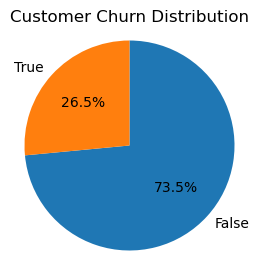

In [20]:
plt.figure(figsize = [9,3])
plt.title("Customer Churn Distribution")
counts = logistic_churn["Churn"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

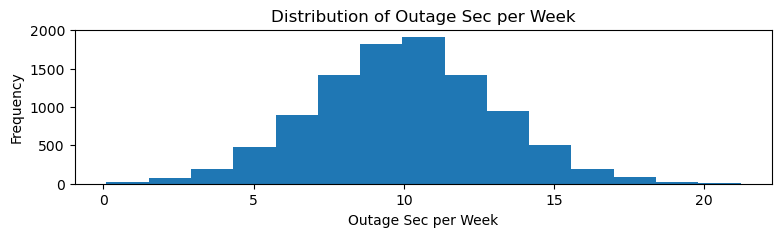

In [21]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Outage Sec per Week')
plt.hist(data=logistic_churn, x="Outage_sec_perweek", bins = 15)
plt.xlabel('Outage Sec per Week')
plt.ylabel("Frequency");

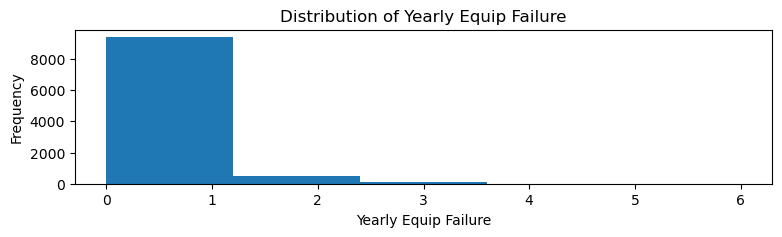

In [22]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Yearly Equip Failure')
plt.hist(data=logistic_churn, x="Yearly_equip_failure", bins = 5)
plt.xlabel('Yearly Equip Failure')
plt.ylabel("Frequency");

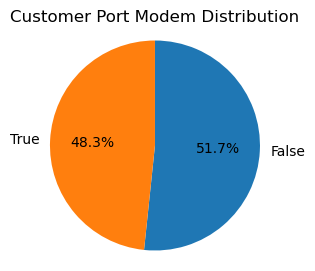

In [23]:
plt.figure(figsize = [9,3])
plt.title("Customer Port Modem Distribution")
counts = logistic_churn["Port_modem"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

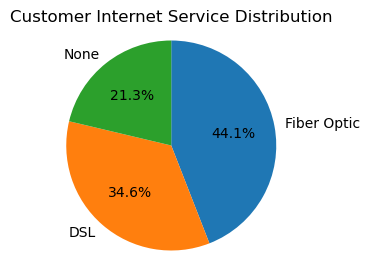

In [24]:
plt.figure(figsize = [9,3])
plt.title("Customer Internet Service Distribution")
counts = logistic_churn["InternetService"].value_counts()
labels = ["Fiber Optic", "DSL", "None"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

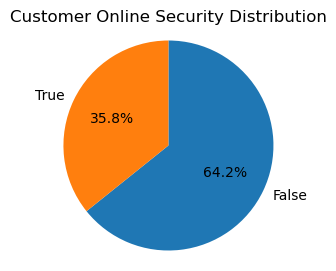

In [25]:
plt.figure(figsize = [9,3])
plt.title("Customer Online Security Distribution")
counts = logistic_churn["OnlineSecurity"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

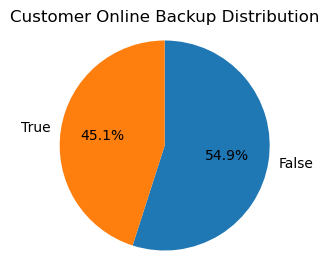

In [26]:
plt.figure(figsize = [9,3])
plt.title("Customer Online Backup Distribution")
counts = logistic_churn["OnlineBackup"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

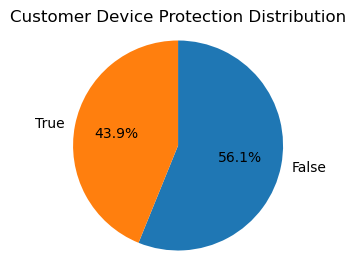

In [27]:
plt.figure(figsize = [9,3])
plt.title("Customer Device Protection Distribution")
counts = logistic_churn["DeviceProtection"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

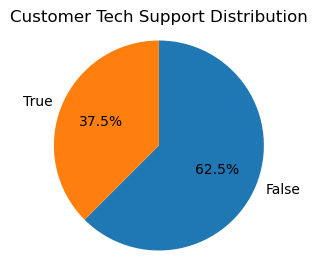

In [28]:
plt.figure(figsize = [9,3])
plt.title("Customer Tech Support Distribution")
counts = logistic_churn["TechSupport"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

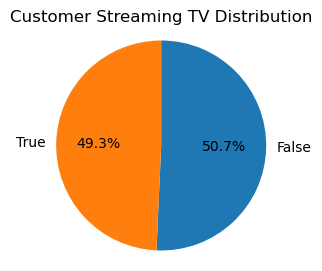

In [29]:
plt.figure(figsize = [9,3])
plt.title("Customer Streaming TV Distribution")
counts = logistic_churn["StreamingTV"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

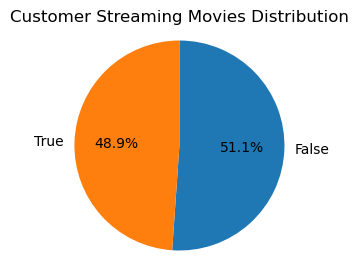

In [30]:
plt.figure(figsize = [9,3])
plt.title("Customer Streaming Movies Distribution")
counts = logistic_churn["StreamingMovies"].value_counts()
labels = ["False", "True"]
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

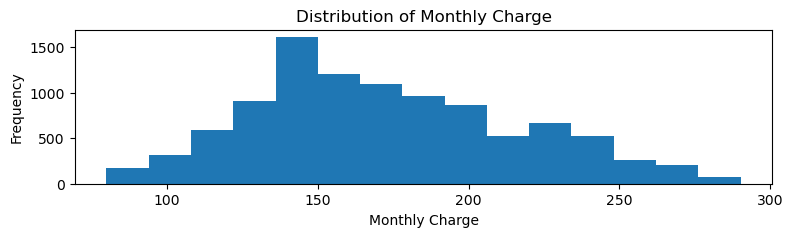

In [31]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Monthly Charge')
plt.hist(data=logistic_churn, x="MonthlyCharge", bins = 15)
plt.xlabel('Monthly Charge')
plt.ylabel("Frequency");

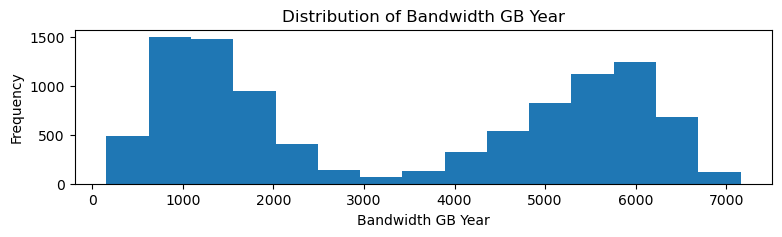

In [32]:
plt.figure(figsize = [9,2])
plt.title('Distribution of Bandwidth GB Year')
plt.hist(data=logistic_churn, x="Bandwidth_GB_Year", bins = 15)
plt.xlabel('Bandwidth GB Year')
plt.ylabel("Frequency");

**Bivariate visualizations**
 - Outage_sec_perweek (continuous) & Churn (categorical)
 - Yearly_equip_failure (continuous) & Churn (categorical)
 - Port_modem (categorical) & Churn (categorical)
 - InternetService (categorical) & Churn (categorical)
 - OnlineSecurity (categorical) & Churn (categorical)
 - OnlineBackup (categorical) & Churn (categorical)
 - DeviceProtection (categorical) & Churn (categorical)
 - TechSupport (categorical) & Churn (categorical)
 - StreamingTV (categorical) & Churn (categorical)
 - StreamingMovies (categorical) & Churn (categorical)
 - MonthlyCharge (continuous) & Churn (categorical)
 - Bandwidth_GB_Year (continuous) & Churn (categorical)

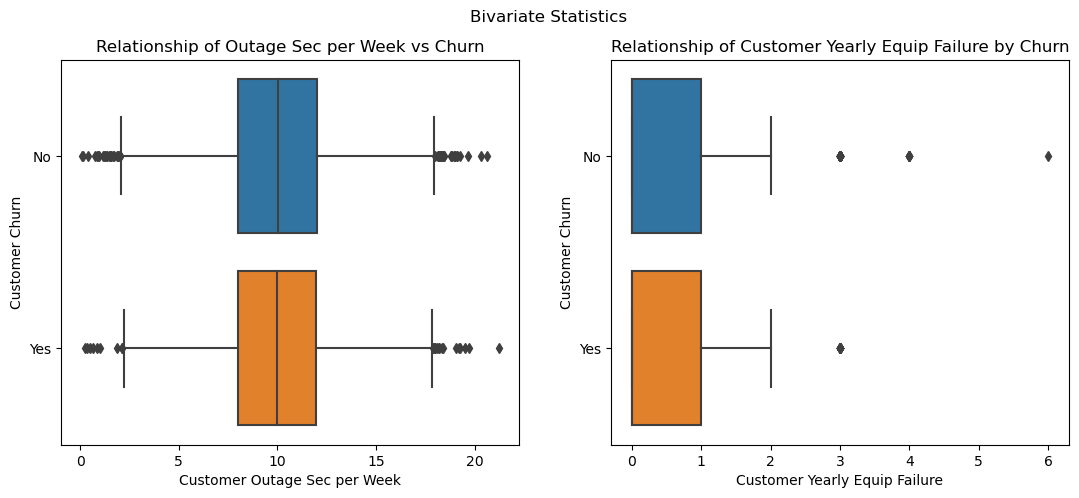

In [33]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of Outage_sec_perweek (continuous) & Churn (categorical)
plt.subplot(1, 2, 1)
plt.title('Relationship of Outage Sec per Week vs Churn')
sns.boxplot(data= logistic_churn, x= "Outage_sec_perweek", y= "Churn")
plt.xlabel('Customer Outage Sec per Week')
plt.ylabel("Customer Churn");

# Right - Bivariate statistics of Yearly_equip_failure (continuous) & Churn (categorical)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Yearly Equip Failure by Churn")
sns.boxplot(data= logistic_churn, x= "Yearly_equip_failure", y= "Churn")
plt.xlabel("Customer Yearly Equip Failure")
plt.ylabel("Customer Churn");

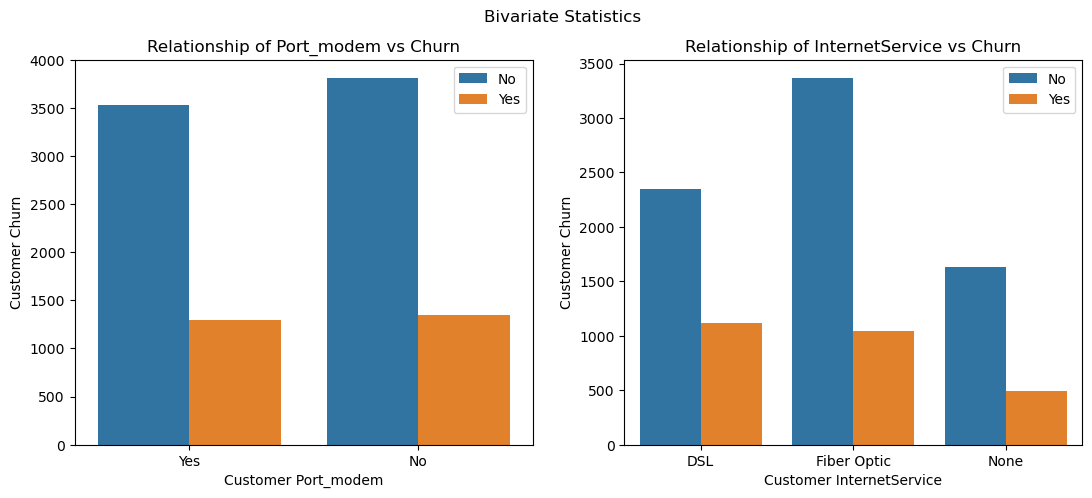

In [34]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of Port_modem (categorical) & Churn (categorical)
plt.subplot(1, 2, 1)
plt.title("Relationship of Port_modem vs Churn")
sns.countplot(data = logistic_churn, x="Port_modem", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer Port_modem")
plt.ylabel("Customer Churn");

# Right - Bivariate statistics of InternetService (categorical) & Churn (categorical)
plt.subplot(1, 2, 2)
plt.title("Relationship of InternetService vs Churn")
sns.countplot(data = logistic_churn, x="InternetService", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer InternetService")
plt.ylabel("Customer Churn");

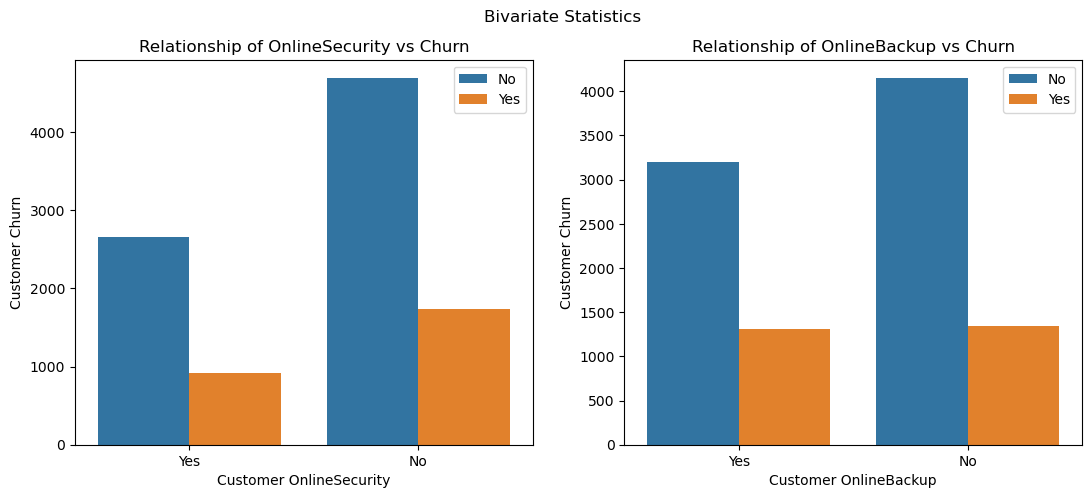

In [35]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of OnlineSecurity (categorical) & Churn (categorical)
plt.subplot(1, 2, 1)
plt.title("Relationship of OnlineSecurity vs Churn")
sns.countplot(data = logistic_churn, x="OnlineSecurity", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer OnlineSecurity")
plt.ylabel("Customer Churn");

# Right - Bivariate statistics of OnlineBackup (categorical) & Churn (categorical)
plt.subplot(1, 2, 2)
plt.title("Relationship of OnlineBackup vs Churn")
sns.countplot(data = logistic_churn, x="OnlineBackup", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer OnlineBackup")
plt.ylabel("Customer Churn");

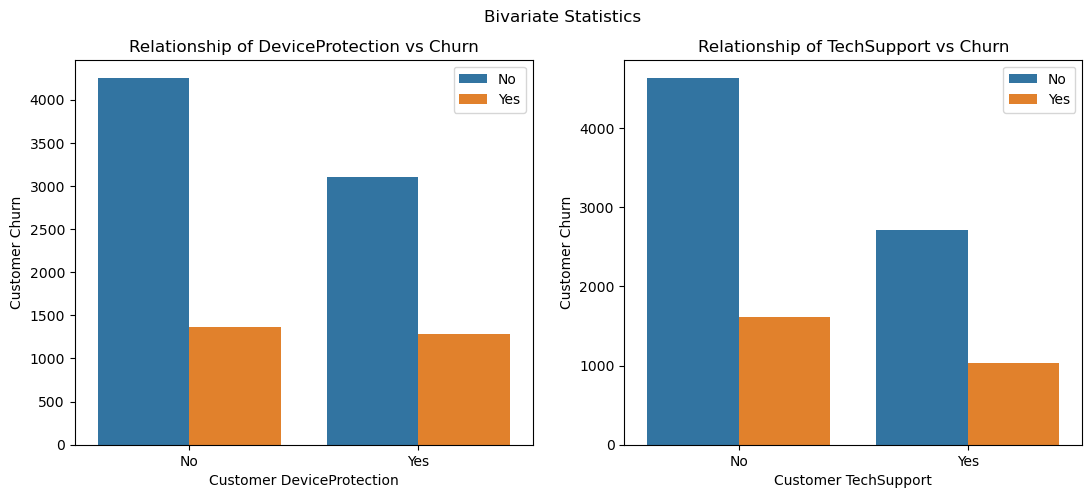

In [36]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of DeviceProtection (categorical) & Churn (categorical)
plt.subplot(1, 2, 1)
plt.title("Relationship of DeviceProtection vs Churn")
sns.countplot(data = logistic_churn, x="DeviceProtection", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer DeviceProtection")
plt.ylabel("Customer Churn");

# Right - Bivariate statistics of TechSupport (categorical) & Churn (categorical)
plt.subplot(1, 2, 2)
plt.title("Relationship of TechSupport vs Churn")
sns.countplot(data = logistic_churn, x="TechSupport", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer TechSupport")
plt.ylabel("Customer Churn");

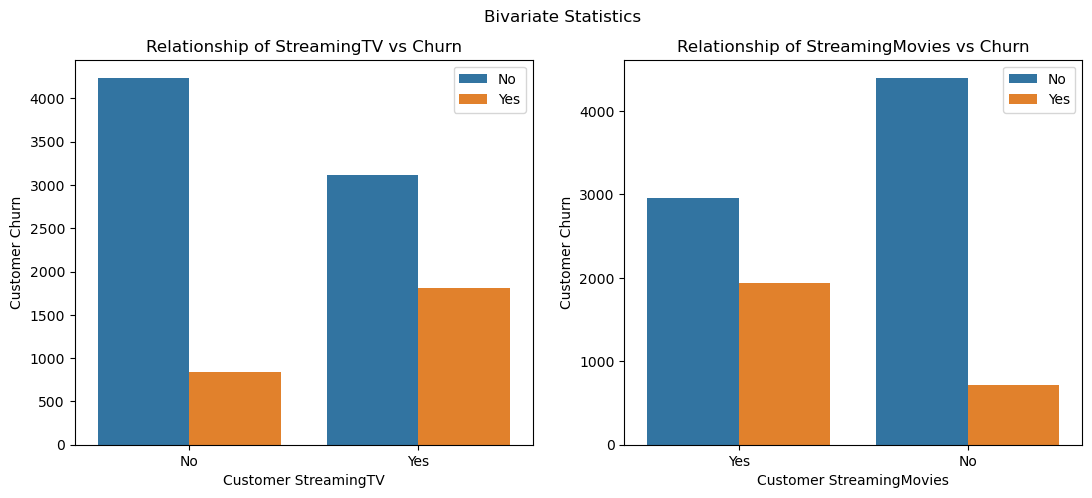

In [37]:
#Adjustment for size and title
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of StreamingTV (categorical) & Churn (categorical)
plt.subplot(1, 2, 1)
plt.title("Relationship of StreamingTV vs Churn")
sns.countplot(data = logistic_churn, x="StreamingTV", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer StreamingTV")
plt.ylabel("Customer Churn");

# Right - Bivariate statistics of StreamingMovies (categorical) & Churn (categorical)
plt.subplot(1, 2, 2)
plt.title("Relationship of StreamingMovies vs Churn")
sns.countplot(data = logistic_churn, x="StreamingMovies", hue="Churn")
plt.legend(["No", "Yes"])
plt.xlabel("Customer StreamingMovies")
plt.ylabel("Customer Churn");

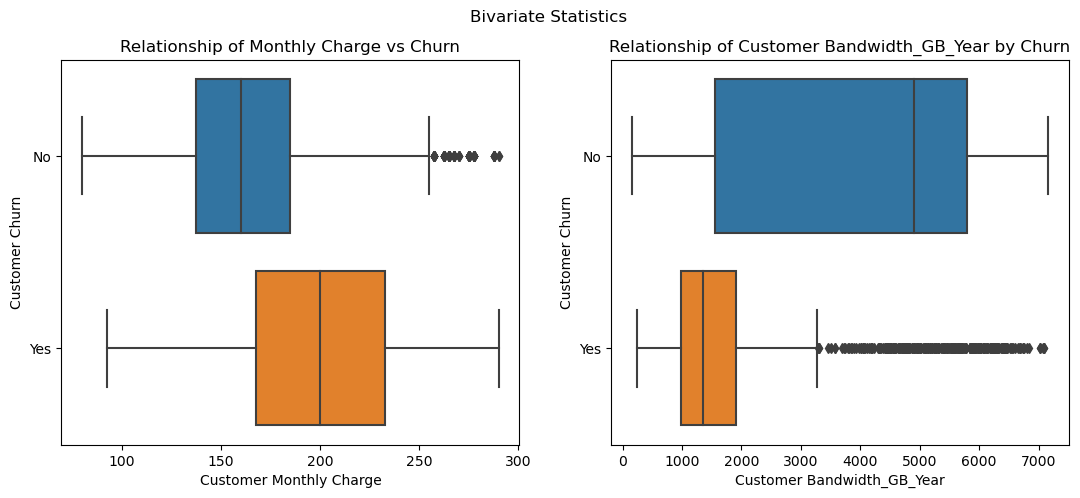

In [38]:
plt.figure(figsize = [13,5])
plt.suptitle("Bivariate Statistics")

# Left - Bivariate statistics of MonthlyCharge (continuous) & Churn (categorical)
plt.subplot(1, 2, 1)
plt.title('Relationship of Monthly Charge vs Churn')
sns.boxplot(data= logistic_churn, x= "MonthlyCharge", y= "Churn")
plt.xlabel('Customer Monthly Charge')
plt.ylabel("Customer Churn");

# Right - Bivariate statistics of Bandwidth_GB_Year (continuous) & Churn (categorical)
plt.subplot(1, 2, 2)
plt.title("Relationship of Customer Bandwidth_GB_Year by Churn")
sns.boxplot(data= logistic_churn, x= "Bandwidth_GB_Year", y= "Churn")
plt.xlabel("Customer Bandwidth_GB_Year")
plt.ylabel("Customer Churn");

## C4: Data Transformation

Dr. Middleton's part 1 webinar went over data wrangling activities needed to perform statistical modeling, "If your data contains categorical data, you must encode it to numbers to perform statistical modeling"(Middleton, 2023). With the goal to change all numbers to numeric, all binary No/Yes variables were replaced with 0 or 1 with the replace python function. Nomial data was one hot encoded and created dummy variables, this was applied to InternetService. With the dummy variables created for InternetService, the first column was dropped to mitigate multicollinearity. The final data wrangling step taken was normalizing all values to 0-1 with sci-kit-learn preprocessing for coefficient comparison later in the model reduction phase of the analysis.

In [39]:
#Finding and replacing yes/no values to 1/0, article refernced for code (Moffitt, 2017)
logistic_churn = logistic_churn.replace('Yes', 1)
logistic_churn = logistic_churn.replace('No', 0)

#Creating dummies for Internet Service, article referenced for code (Ebner, 2022) 
InternetService = pd.get_dummies(data=logistic_churn["InternetService"], drop_first=True)
InternetService.rename(columns={"Fiber Optic": "Internet_Fiber_Optic", "None":"Internet_None"}, inplace = True)

#Inserting Internet Service dummies into logistic_churn dataframe
logistic_churn.insert(5, "Internet_None", InternetService.Internet_None)
logistic_churn.insert(5, "Internet_Fiber_Optic", InternetService.Internet_Fiber_Optic)
logistic_churn.drop(columns=['InternetService'],inplace=True)

#Normalizing values to 0-1
#MinMaxScaler article referenced for code (Sabu, 2022)
scaler = MinMaxScaler()
logistic_churn[['Outage_sec_perweek','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year']] = scaler.fit_transform(logistic_churn[['Outage_sec_perweek','Yearly_equip_failure','MonthlyCharge','Bandwidth_GB_Year']])

logistic_churn

,Churn,Outage_sec_perweek,Yearly_equip_failure,Port_modem,Internet_Fiber_Optic,Internet_None,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,
1,0,0.373260,0.166667,1,1,0,1,1,0,0,0,1,0.439985,0.106951
2,1,0.549537,0.166667,0,1,0,1,0,0,0,1,1,0.773872,0.092165
3,0,0.504705,0.166667,1,0,0,0,0,0,0,0,1,0.380474,0.271180
4,0,0.701827,0.000000,0,0,0,1,0,0,0,1,0,0.190207,0.286868
5,1,0.381271,0.166667,1,1,0,0,0,0,1,1,0,0.332900,0.016561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0,0.441369,0.000000,1,0,0,0,1,1,0,0,0,0.380626,0.907513
9997,0,0.314618,0.000000,0,1,0,1,1,1,0,1,0,0.606629,0.791099
9998,0,0.307529,0.000000,0,1,0,1,1,0,0,0,0,0.428179,0.571688


## C5: Prepared Data Set

The CSV "Logistic_Regress_Prepared_Data" was provided with the submission of the project.

In [40]:
#Save prepared logistic regression dataset to CSV 
logistic_churn.to_csv('C:/Users/alexa/WGU/D208/Project/Logistic_Regress_Prepared_Data.csv', index=False)

## D1: Initial Model

The final output from section C4 was used in implementing the initial logistic regression model. The target or dependent variable used for the analysis is churn. The multiple independent variables are Outage_sec_perweek,  Yearly_equip_failure,  Port_modem,  Internet_Fiber_Optic,  Internet_None,  OnlineSecurity,  OnlineBackup,  DeviceProtection,  TechSupport,  StreamingTV,  StreamingMovies,  MonthlyCharge,  Bandwidth_GB_Year. A constant of 1 was added to the independent variables. Predictive modeling webinar Episode 4 was referenced for Logistic Regression code implementation (Sewell, 2023).  

In [41]:
#Predictive modeling webinar Episode 4 was referenced for Logistic Regression code (Sewell, 2023)
#Initial model for Multiple Linear Regression

#Y dependent variable
y = logistic_churn.Churn
#X multiple independent variables
X = logistic_churn[["Outage_sec_perweek","Yearly_equip_failure","Port_modem","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MonthlyCharge","Bandwidth_GB_Year"]].assign(Constant=1)

Logit_model = sm.Logit(y, X)
results = Logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.308551
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.4664
Time:                        10:50:23   Log-Likelihood:                -3085.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Outage_sec_perweek       0.0025      0.227      0.011      0.991      -0.441       0.447

In [42]:
print(results.aic)

6199.0125595501195


In [43]:
print(results.bic)

6299.957324757786


## D2: Justification Of Model Reduction

Of the three feature selection methods discussed in the Part 1 webinar a wrapper method will chosen to reduce the logistic regression model. The wrapper method backward stepwise elimination aligns with the research question, "Which factors significantly impact customer churn?" because of its iterative process, "start with all the features and removes the least significant feature (based on p-value) at each iteration which improves the performance of the model" (Sewell, 2023). Reducing features with p values greater than .05 will only leave variables that significantly impact churn, making it the best model reduction option presented to analyze the research question. Ahead of the model reduction method being applied the initial model will be checked for multicollinearity. 

## D3: Reduced Logistic Regression Model

Backward stepwise elimination was implemented as discussed in section D2 and multicollinearity was checked to get the reduced model below.

 - The dependent variable is Churn. 

 - The independent variables are Internet_Fiber_Optic, Internet_None, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Bandwidth_GB_Year. 

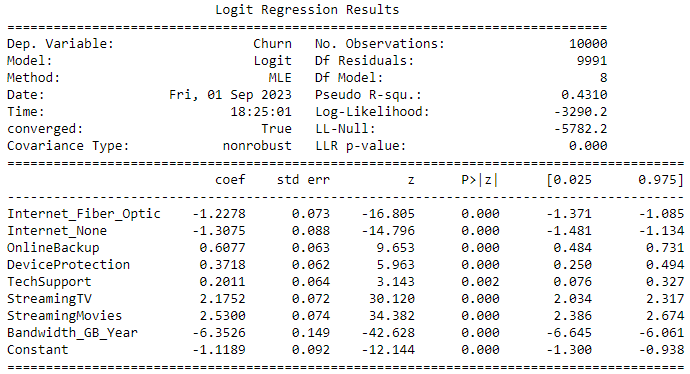

In [44]:
#Checking for multicollinearity VIF >10, Episode 1 coding was referenced (Sewell, 2023)
#the independent variables set
X = logistic_churn[["Outage_sec_perweek","Yearly_equip_failure","Port_modem","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","MonthlyCharge","Bandwidth_GB_Year"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature        VIF
0     Outage_sec_perweek   6.455970
1   Yearly_equip_failure   1.368490
2             Port_modem   1.863380
3   Internet_Fiber_Optic   2.718258
4          Internet_None   1.602091
5         OnlineSecurity   1.539279
6           OnlineBackup   2.486403
7       DeviceProtection   1.973361
8            TechSupport   1.746518
9            StreamingTV   4.554511
10       StreamingMovies   5.877693
11         MonthlyCharge  29.206417
12     Bandwidth_GB_Year   2.951727


In [45]:
#Removed MonthlyCharge, Checking for multicollinearity VIF >10, Episode 1 coding was referenced (Sewell, 2023)
#the independent variables set
X = logistic_churn[["Outage_sec_perweek","Yearly_equip_failure","Port_modem","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"]]

#VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_data)

                 feature       VIF
0     Outage_sec_perweek  6.160607
1   Yearly_equip_failure  1.367558
2             Port_modem  1.861273
3   Internet_Fiber_Optic  2.092565
4          Internet_None  1.528704
5         OnlineSecurity  1.524749
6           OnlineBackup  1.764523
7       DeviceProtection  1.733355
8            TechSupport  1.548107
9            StreamingTV  1.906110
10       StreamingMovies  1.898891
11     Bandwidth_GB_Year  2.933441


In [46]:
#Backward elimination #1 p-value > 0.05 elimated Outage_sec_perweek with a p-value of 0.991

y = logistic_churn.Churn
X = logistic_churn[["Yearly_equip_failure","Port_modem","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"]].assign(Constant=1)


Logit_model = sm.Logit(y, X)
results = Logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.328810
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.4313
Time:                        10:50:35   Log-Likelihood:                -3288.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Yearly_equip_failure    -0.2334      0.293     -0.795      0.426      -0.808       0.342

In [47]:
#Backward elimination #2 p-value > 0.05 elimated Yearly_equip_failure with a p-value of 0.426

y = logistic_churn.Churn
X = logistic_churn[["Port_modem","Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"]].assign(Constant=1)


Logit_model = sm.Logit(y, X)
results = Logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.328842
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.4313
Time:                        10:50:36   Log-Likelihood:                -3288.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Port_modem               0.0790      0.062      1.273      0.203      -0.043       0.201

In [48]:
#Backward elimination #3 p-value > 0.05 elimated Port_modem with a p-value of 0.203

y = logistic_churn.Churn
X = logistic_churn[["Internet_Fiber_Optic","Internet_None","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"]].assign(Constant=1)

Logit_model = sm.Logit(y, X)
results = Logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.328923
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.4311
Time:                        10:50:36   Log-Likelihood:                -3289.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Internet_Fiber_Optic    -1.2280      0.073    -16.804      0.000      -1.371      -1.085

In [49]:
#Backward elimination #4 p-value > 0.05 elimated OnlineSecurity with a p-value of 0.154

y = logistic_churn.Churn
X = logistic_churn[["Internet_Fiber_Optic","Internet_None","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Bandwidth_GB_Year"]].assign(Constant=1)

Logit_model = sm.Logit(y, X)
results = Logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.329025
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 07 Sep 2023   Pseudo R-squ.:                  0.4310
Time:                        10:50:37   Log-Likelihood:                -3290.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Internet_Fiber_Optic    -1.2278      0.073    -16.805      0.000      -1.371      -1.085

In [50]:
print(results.aic)

6598.490019544735


In [51]:
print(results.bic)

6663.383082892521


## E1: Model Comparison

Section D3 went through the process of reducing the logistic regression model, now we have the ability to compare the initial model to the reduced model by the outputs of the summaries. Dr. Middleton's part 2 webinar was an amazing guideline for evaluating and comparing the model through model evaluation metrics. A good baseline before the comparison is to see if the models are useful this can be done with the LLR-p-value, "This value can be thought of as the substitute for the p-value for the overall linear regression model"(Middleton, 2023). Both the initial and reduced models had an LLR-p-value of 0.00 which is below the threshold of equal or less than 0.05 meaning that both models are useful. For a comparison of an initial and reduced model with different counts of predictor variables the Pseudo R squared is a good test for better fit. According to Dr. Middleton's webinar, "This value is on a scale from 0 to 1, with higher values meaning a better fit"(Middleton, 2023). The initial logistic model had a Pseudo R squared of 0.4664. The reduced logistic had a Pseudo R squared of 0.4310. Comparing the two models the initial model had better fit but the reduced model with fewer predictor variables was nearly the same. 

## E2: Output And Calculations

•	Confusion matrix

In [52]:
#Creating the confusion matrix, article refernced for code(Galarnyk, 2022)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
Logistic = LogisticRegression()
Logistic.fit(X_train, y_train)
y_pred = Logistic.predict(X_test)

Matrix = confusion_matrix(y_test, y_pred)
print(Matrix)

[[2002  199]
 [ 286  513]]


•	Accuracy calculation

In [53]:
#Accuracy calculation
Logistic.score(X_test, y_test)

0.8383333333333334

## E3: Code

The ipynb file "D208-2" was provided with the submission of the project.

## F1: Results

#### Reduced logistic regression model equation

$$
ln\frac{\hat{p}}{(1-\hat{p})} = -1.1189 - 1.2278(Internet_Fiber_Optic) - 1.3075(Internet_None) + 0.6077(OnlineBackup) + 0.3718(DeviceProtection) + 0.2011(TechSupport) + 2.1752(StreamingTV) + 2.5300(StreamingMovies) - 6.3526(Bandwidth_GB_Year)
$$

#### Interpretation of the coefficients of the reduced model

•	Keeping all things constant, for one unit increase in Internet_Fiber_Optic, the changes log odds of  Churn by -1.2278.

    - The difference between Internet_Fiber_Optic and the reference group (Internet_DSL) is -1.2278.

•	Keeping all things constant, for one unit increase in Internet_None , the changes log odds of  Churn by -1.3075.
    
    - The difference between Internet_None and the reference group (Internet_DSL) is -1.3075.

•	Keeping all things constant, for one unit increase in OnlineBackup, the changes log odds of  Churn by 0.6077.

•	Keeping all things constant, for one unit increase in DeviceProtection, the changes log odds of  Churn by 0.3718.

•	Keeping all things constant, for one unit increase in TechSupport, the changes log odds of  Churn by 0.2011.

•	Keeping all things constant, for one unit increase in StreamingTV, the changes log odds of  Churn by 2.1752.

•	Keeping all things constant, for one unit increase in StreamingMovies, the changes log odds of  Churn by 2.5300.

•	Keeping all things constant, for one unit increase in Bandwidth_GB_Year, the changes log odds of  Churn by -6.3526.

•	The only difference left to interpret is the difference between Internet_Fiber_Optic and Internet_None:

     = (Internet_Fiber_Optic - Internet_DSL) - (Internet_None - Internet_DSL)

     = -1.2278 - -1.3075
 
     = 0.0797    
     
#### Statistical  and practical significance of the reduced model

The reduced model is statistically significant due to the metrics discussed in section E1. The LLR-p-value of the reduced model is 0.00 stating that the model was statistically useful for the logistic analysis. The LLR-p-value was the best metric for usefulness discussed in the reading material, all other metrics were best applied in the comparison between models. The Pseudo R squared was 0.4310 and according to the IBM statistical documentation, "What constitutes a “good” R 2 value varies between different areas of application" (Pseudo R square, 2023). My interpretation of the Pseudo R squared value is that it would be statistically significant in the application of the analysis of this project. Finally, the accuracy calculation score of the final reduced model seemed statistically high at 0.8383. 

The reduced model is not practically significant due to the possible interpretation of the Pseudo R squared value. In a business setting the Pseudo R squared value 0.4310 or "the proportion of variance in the dependent variable associated with the predictor (independent) variable" leaves a lot for interpretation of the usefulness of the model. While the application of the model can be put into production, it has room for improvement in the analysis. 

#### Limitations

There were a few limitations that stood out during the logistic regression analysis: the dataset, model reduction method, and the model evaluation methods. In regards to the dataset, my main limitation is the possibility of the sample size not being large enough for the analysis, with 10,000 observations not sure if this was adequate to answer the research question. The research question, "Which factors significantly impact customer churn?" led to the use of the backward elimination method when reducing the logistic model. All metrics after the reduction method was applied stated that the initial model was a better fit. A better understanding of any other reduction method that would best impact the reduced model could be a limitation of this analysis. 

## F2: Recommendations

A recommendation can now be given on the analysis done on the research question, "Which factors significantly impact customer churn?". The research while vague had the ability to cast a wide net to focus on what is most significant from the initial to the reduced models. The recommendation would be to continue further analysis of the factors that impact customer churn. The results while statistically significant left a lot for interpretation. The initial model was better fitting by all evaluation methods compared to the reduced model, going back to the drawing board to adjust the analysis could possibility impact it. Further research on model reduction methods can lead to a bigger impact on significance.  

## G: Panopto Demonstration

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=2d2b993c-1835-4777-842b-b07601252001

## H: Sources Of Third-Party Code

Ebner, J. (2022, March 29). How to use pandas get dummies in python. Sharp Sight. https://www.sharpsightlabs.com/blog/pandas-get-dummies/ 

Galarnyk, M. (2022, April 27). Logistic regression using python (scikit-learn). Medium. https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a 

Moffitt, C. (2017, February 6). Guide to encoding categorical values in&nbsp;python. Practical Business Python Atom. https://pbpython.com/categorical-encoding.html 

Rivera, Alex. (2023). Task 1: Data Cleaning. Unpublished manuscript, Western Governors University.

Rivera, Alex. (2023). Task 1:  Linear Regression Modeling. Unpublished manuscript, Western Governors University.

Sabu, H. (2022, February 3). Data pre-processing with Sklearn using standard and Minmax Scaler. GeeksforGeeks. https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/ 

Sewell, W. (2023a, July). D208 predictive modeling webinar - Episode 1. my.wgu.edu. Retrieved August 27, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Sewell%20D208_Predictive_Modeling_Webinar_Episode%201t.pptx?d=w285c378f808947589abe29976d079b56&amp;csf=1&amp;web=1&amp;e=EDZkfD. 

Sewell, W. (2023, July). D208 predictive modeling webinar - Episode 4. my.wgu.edu. Retrieved August 27, 2023, from https://westerngovernorsuniversity.sharepoint.com/:p:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Sewell%20D208_Predictive_Modeling_Webinar_Episode%204.pptx?d=w1c293b743198404e9032304807c8fade&amp;csf=1&amp;web=1&amp;e=MOsdbl. 


## I: Sources


Bobbitt, Z. (2020, October 13). The 6 assumptions of logistic regression (with examples). Statology. https://www.statology.org/assumptions-of-logistic-regression/ 

Middleton, K. (2023, July). “Getting Started&nbsp; with D208” Part I. https://westerngovernorsuniversity.com. Retrieved from https://westerngovernorsuniversity.sharepoint.com/:b:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Middleton%20Getting%20Started%20with%20D208(Part%20I)COIT.pdf?csf=1&amp;web=1&amp;e=YEjlJ0. 

Middleton, K. (2023, July). “Getting Started&nbsp; with D208” Part II. https://westerngovernorsuniversity.com. Retrieved from https://westerngovernorsuniversity.sharepoint.com/:b:/r/sites/DataScienceTeam/Shared%20Documents/Graduate%20Team/D208/Student%20Facing%20Resources/Dr.%20Middleton%20Getting%20Started%20with%20D208%20(Part%20II)COIT.pdf?csf=1&web=1&e=MVdCCj. 

Pseudo R square. (n.d.). https://www.ibm.com/docs/en/spss-statistics/saas?topic=model-pseudo-r-square 

R or python. Western Governors University. (2022, November 16). https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html 

Rivera, Alex. (2023). Task 1:  Linear Regression Modeling. Unpublished manuscript, Western Governors University.